In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import trimesh
import random
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Regenerate the UV Maps

##### ℹ️ This notebook requires some ShapeNetCore samples in the `dataset/shapenet/objects` folder. It also requires the `statistics.parquet`.

The dataset generated so far is quite poor. The UV maps often lack the interesting patterns needed to guide the diffusion process with ControlNet. This is expecially true for ShapeNetCore samples.

In this notebook we ask if we can regenerate the UV Maps using Blender _Smart UV Project_ function, while preserving the effective texture mapping.

## ShapeNetCore

In [24]:
dataset = ShapeNetCoreDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [30]:
UID = random.choice(uids)
UID = "1a0a2715462499fbf9029695a3277412"
print(UID)
obj = dataset[UID]
trimesh.load(obj.path).show()

1a0a2715462499fbf9029695a3277412
Info: Removed 146 vertices


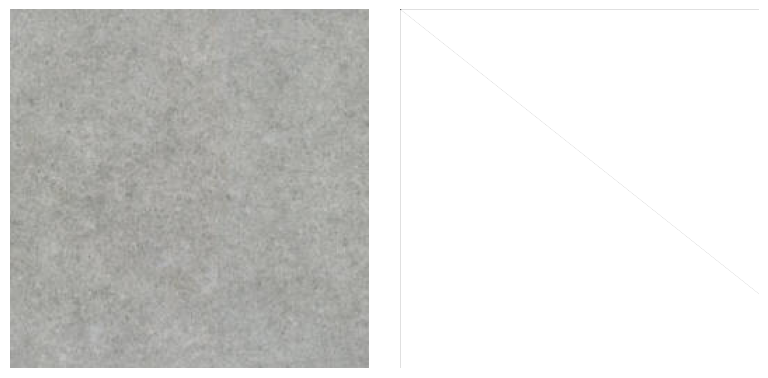

In [31]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:34.53M (Peak 497.77M) | Time:10:31.66 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | material_2_1_8
Fra:1 Mem:34.54M (Peak 497.77M) | Time:10:31.67 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:34.54M (Peak 497.77M) | Time:10:31.67 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Fra:1 Mem:34.54M (Peak 497.77M) | Time:10:31.67 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Info: Baking map saved to internal image, save it externally or pack it


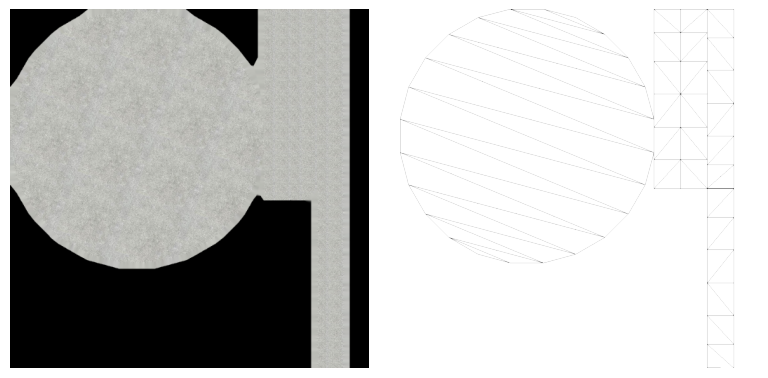

In [32]:
new_tex, new_uv = obj.regenerate_uv_map(bake_type="GLOSSY", samples=8, device="CPU")
plot_images([new_tex, new_uv], cols=2, size=4)

In [ ]:
renderings = obj.render(views=4)

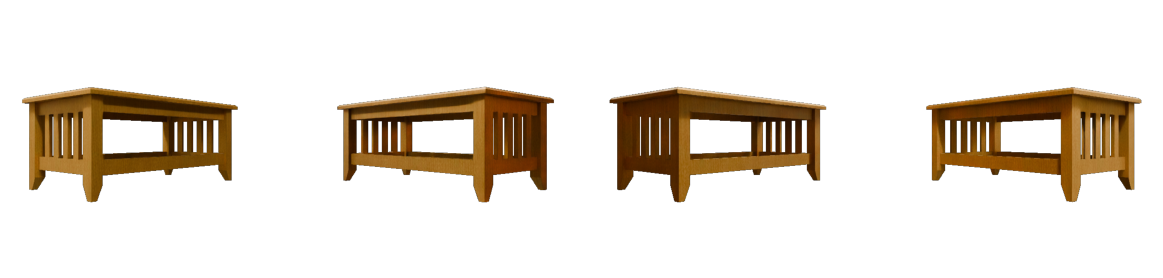

In [8]:
plot_images(renderings,size=3)

### Visualize ShapeNetCore regenerated renderings

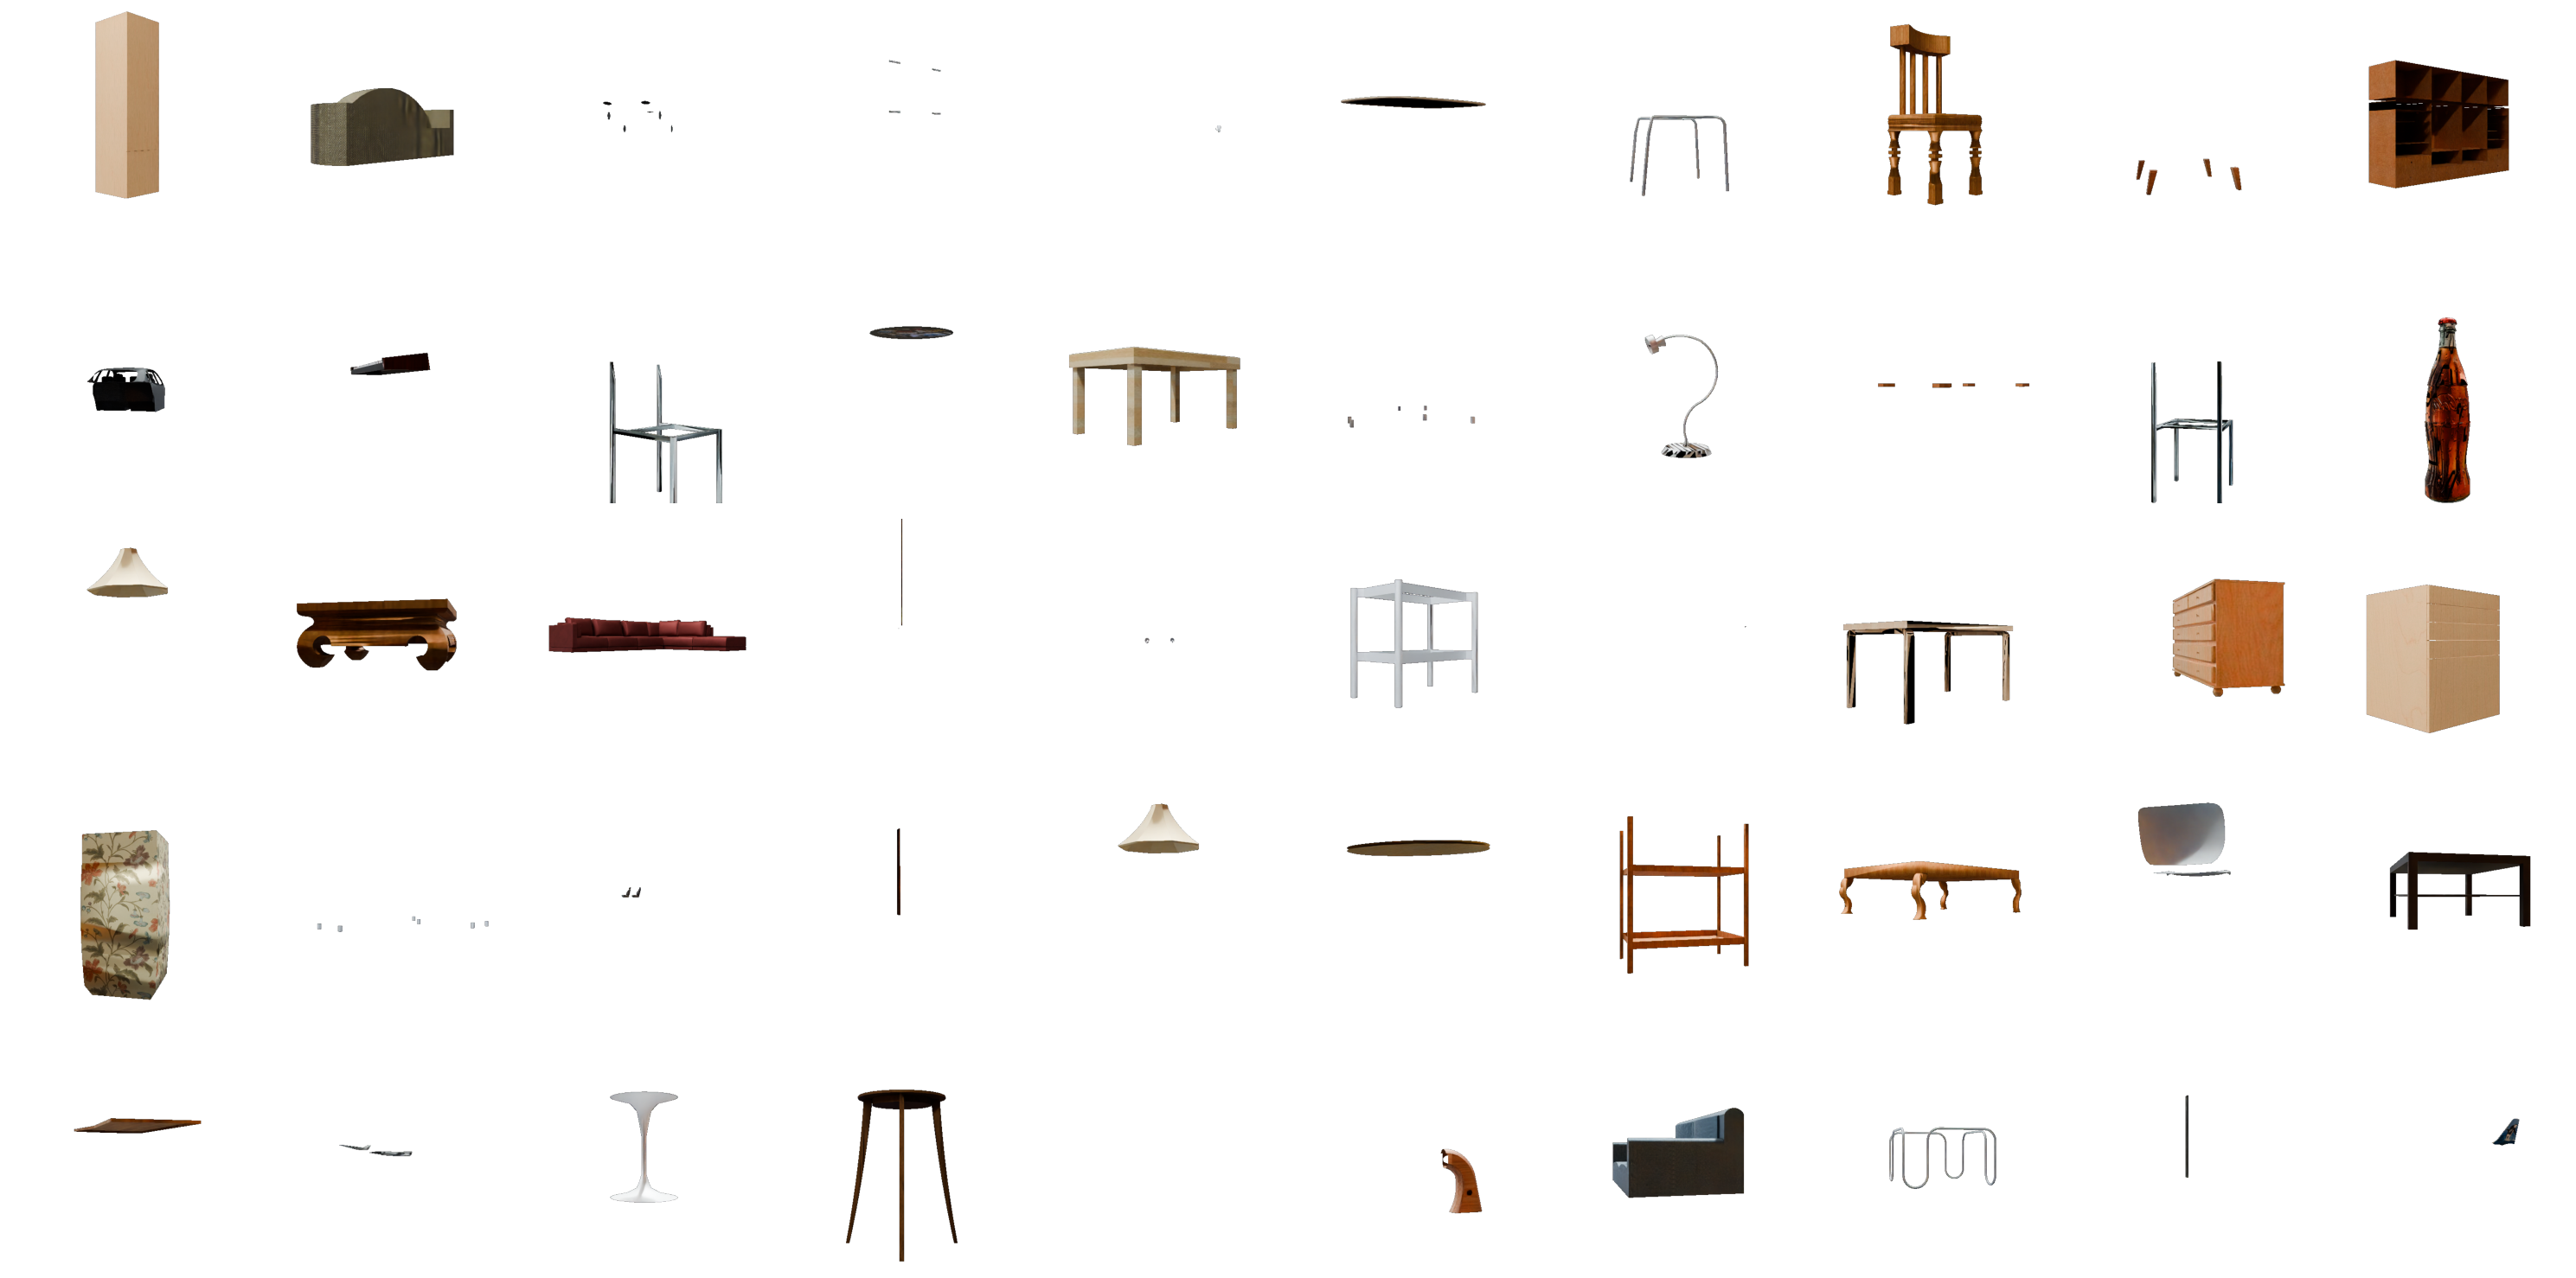

In [38]:
uids = [x.name for x in Path("../dataset/shapenetcore/render/").glob("*.png")]
uids = list(random.choices(uids, k=50))
plot_images(
    [Path("../dataset/shapenetcore/render/") / x for x in uids]
)

## Objaverse

In [2]:
dataset = ObjaverseDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [ ]:
UID = uids[random.randint(0, len(uids) - 1)]
UID = "4faf118e1d4442868b9fe746cc1772f4"
obj = dataset[UID]
# trimesh.load(obj.path).show()

In [4]:
obj.export(Path('./scene.blend').resolve())

Info: Saved "scene.blend"


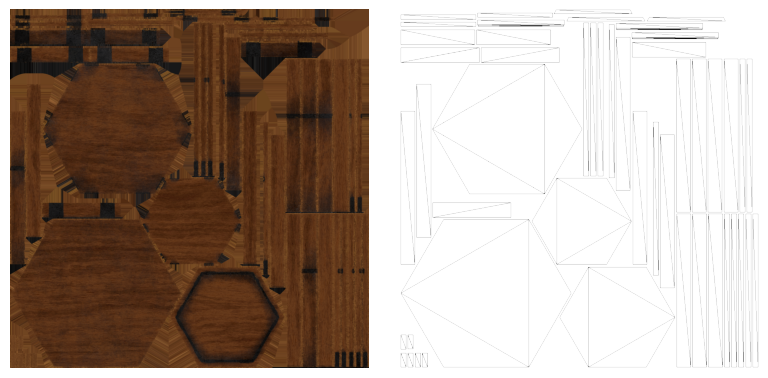

In [21]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:36.86M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.003
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Fra:1 Mem:41.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Fra:1 Mem:42.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.001
Info: Baking map saved to internal image, save it externally or pack it


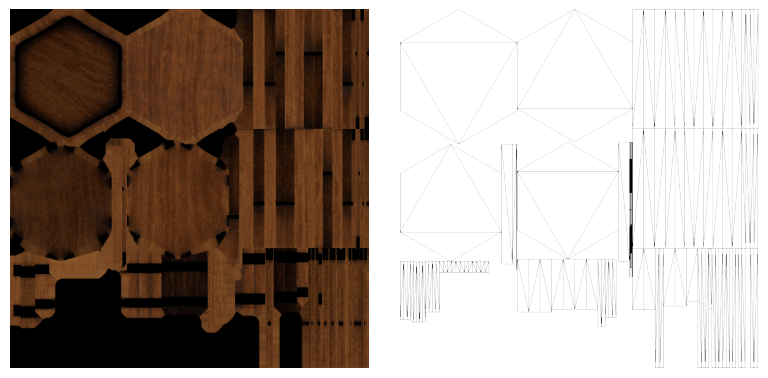

In [8]:
new_tex, new_uv = obj.regenerate_uv_map(samples=16)
plot_images([new_tex, new_uv], cols=2, size=4)

In [ ]:
renderings = obj.render(views=4)

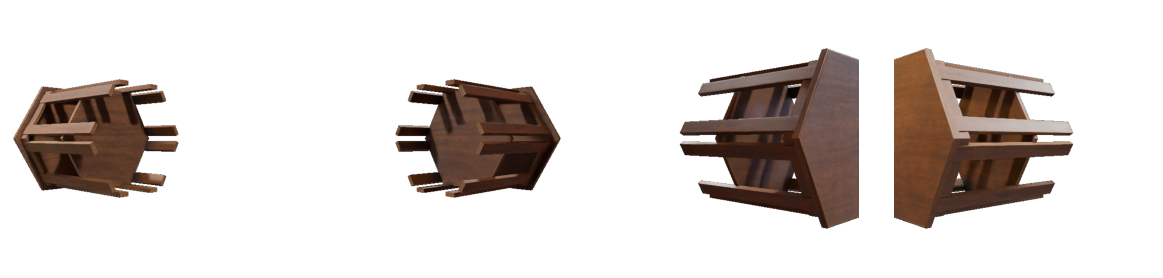

In [10]:
plot_images(renderings, size=3)